In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_csv("taxi-sample.csv", parse_dates=["tpep_pickup_datetime"])
df = df.sample(frac=0.5)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
393254,2,2018-12-30 01:07:07,12/30/2018 01:16:39 AM,2,1.89,1,N,239,263,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
698341,2,2018-12-28 16:49:49,12/28/2018 05:02:30 PM,5,2.59,1,N,238,48,1,11.0,1.0,0.5,3.20,0.0,0.3,16.00
113938,2,2018-12-31 15:09:26,12/31/2018 03:23:42 PM,2,2.88,1,N,97,232,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
270073,2,2018-12-30 17:35:58,12/30/2018 05:41:16 PM,1,0.66,1,N,79,79,1,5.5,0.0,0.5,1.26,0.0,0.3,7.56
962474,1,2018-12-27 13:49:34,12/27/2018 01:59:03 PM,1,1.30,1,N,170,107,1,8.5,0.0,0.5,2.30,0.0,0.3,11.60


In [53]:
df['pickup_day']=pd.to_datetime(df.tpep_pickup_datetime,format='%Y-%m-%d %H:%M:%S').dt.day
df['pickup_month']=pd.to_datetime(df.tpep_pickup_datetime,format='%Y-%m-%d %H:%M:%S').dt.month
df['pickup_year']=pd.to_datetime(df.tpep_pickup_datetime,format='%Y-%m-%d %H:%M:%S').dt.year
df['pickup_weekday'] = pd.DatetimeIndex(df.tpep_pickup_datetime).dayofweek
df['pickup_hour']=pd.to_datetime(df.tpep_pickup_datetime,format='%Y-%m-%d %H:%M:%S').dt.hour
df['mid_night_trip']=((df['pickup_hour']>23) | (df['pickup_hour']<6)).astype(int)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip
393254,2,2018-12-30 01:07:07,12/30/2018 01:16:39 AM,2,1.89,1,N,239,263,1,...,2.06,0.0,0.3,12.36,30,12,2018,6,1,1
698341,2,2018-12-28 16:49:49,12/28/2018 05:02:30 PM,5,2.59,1,N,238,48,1,...,3.20,0.0,0.3,16.00,28,12,2018,4,16,0
113938,2,2018-12-31 15:09:26,12/31/2018 03:23:42 PM,2,2.88,1,N,97,232,1,...,2.76,0.0,0.3,16.56,31,12,2018,0,15,0
270073,2,2018-12-30 17:35:58,12/30/2018 05:41:16 PM,1,0.66,1,N,79,79,1,...,1.26,0.0,0.3,7.56,30,12,2018,6,17,0
962474,1,2018-12-27 13:49:34,12/27/2018 01:59:03 PM,1,1.30,1,N,170,107,1,...,2.30,0.0,0.3,11.60,27,12,2018,3,13,0


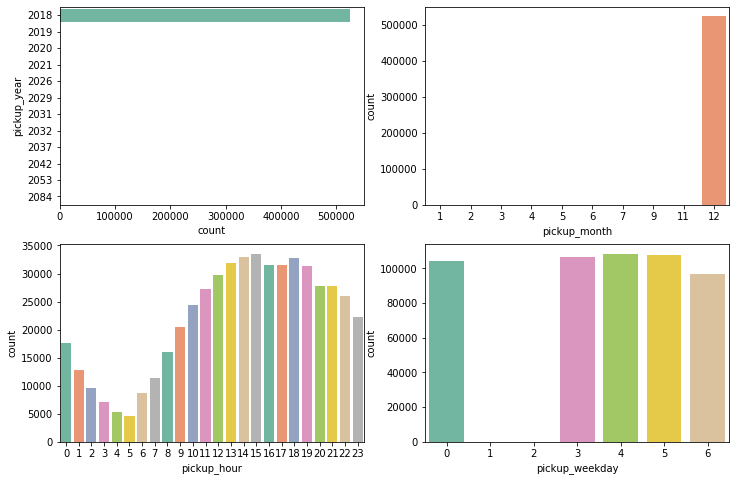

In [54]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(y='pickup_year', data=df,palette='Set2')
plt.subplot(2,2,2)
sns.countplot(x='pickup_month', data=df,palette='Set2')
plt.subplot(2,2,3)
sns.countplot(x='pickup_hour', data=df,palette='Set2')
plt.subplot(2,2,4)
sns.countplot(x='pickup_weekday', data=df,palette='Set2')
plt.show()

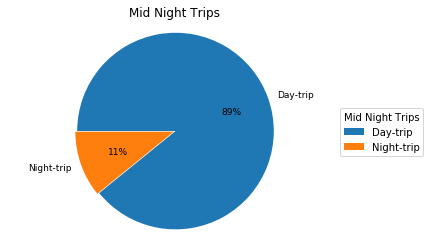

Wall time: 167 ms


In [55]:
%%time
#plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
explode = (0.01, 0.01)
trips = ['Day-trip','Night-trip']
count = df['mid_night_trip'].value_counts()
plt.pie(count,labels=trips,autopct='%1.0f%%',explode=explode,textprops={'fontsize': 9}, counterclock=False,startangle=180)
plt.axis('equal')
plt.legend(trips,title='Mid Night Trips', bbox_to_anchor=(1.1,0.5),loc='right', bbox_transform=plt.gcf().transFigure)
plt.title("Mid Night Trips")
plt.show()

In [56]:
#df.plot(x='total_amount',y='trip_distance',kind='scatter',color='red')